
<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Владимир! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

<a id='start'></a>
# Проект: Обучение с учителем: качество модели

**Описание проекта:**  
Интернет-магазин «В один клик» хочет продолжать удерживать активность постоянных клиентов с помощью персонализированных предложений. Необходимо разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.  
**Цель проекта:**  
Построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.  
**Задачи:**  
* [Изучить и подготовить данные](#download)
* [Провести предобработку данных](#preprocessing)
* [Провести исследователький анализ данных](#research)
* [Провести объединение данных](#merge)
* [Провести корреляционный анализ данных](#corr)
* [Разработать модели для предсказания активности клиентов](#models)
* [Провести анализ важности признаков модели](#importance)
* [Провести анализ сегментов пользователей](#segment)
* [Предоставить вывод по проделанной работе](#conclusion)

<a id='download'></a>
## [Загрузка данных](#start)

**Для корректной работы проекта были установлены:**
* Обновление sklearn
* Модуль shap
* matplotlib версии 3.7.0

In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib==3.7.0

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Импортируем необходимые библиотеки
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 


<div class="alert alert-warning">


Совет:

   

- есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Есть что поправить 

 

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Добрый день. Спасибо за ревью. Я стараюсь учитывать все дополнительные комментарии, но не всегда в текущем проекте.</font>
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Привет Владимир!  Спасибо за работу, давай посмотрим на исправления


 

In [5]:
# Загружаем данные и просматриваем первичную информацию
market_file = pd.read_csv('/datasets/market_file.csv')
market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [6]:
# Приводит названия колонок к "змеинному регистру"
market_file_col = market_file.columns.tolist()
for i in range(len(market_file_col)):
    market_file_col[i] = market_file_col[i].lower().replace(' ', '_')
# Меняем названия колонок в датасете
market_file.columns = market_file_col
# Снова проверяем общую информацию о датасете
market_file.info()
market_file.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



правильно что используешь автоматизированный подход при работе со стилистикой


 

In [7]:
# Загружаем данные и просматриваем первичную информацию
market_money = pd.read_csv('/datasets/market_money.csv')
market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [8]:
# Приводит названия колонок к "змеинному регистру"
market_money_col = market_money.columns.tolist()
for i in range(len(market_money_col)):
    market_money_col[i] = market_money_col[i].lower()
# Меняем названия колонок в датасете
market_money.columns = market_money_col
# Снова проверяем общую информацию о датасете
market_money.info()
market_money.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [9]:
# Загружаем данные и просматриваем первичную информацию
market_time = pd.read_csv('/datasets/market_time.csv')
market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [10]:
# Приводит названия колонок к "змеинному регистру"
market_time_col = market_time.columns.tolist()
for i in range(len(market_time_col)):
    market_time_col[i] = market_time_col[i].lower()
# Меняем названия колонок в датасете
market_time.columns = market_time_col
# Снова проверяем общую информацию о датасете
market_time.info()
market_time.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [11]:
# Загружаем данные и просматриваем первичную информацию
# Видим, что в датасете используется разделитель ';'
money = pd.read_csv('/datasets/money.csv', ';', decimal = ',')
money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


In [12]:
# Приводит названия колонок к "змеинному регистру"
money_col = money.columns.tolist()
for i in range(len(money_col)):
    money_col[i] = money_col[i].lower()
# Меняем названия колонок в датасете
money.columns = money_col
# Снова проверяем общую информацию о датасете
money.info()
money.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13
3,215351,4.87
4,215352,4.21


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


Для этого файла используй descimal = ',', и данные сразу прочтутся корректно, и тогда всё это не нужно будет 

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Исправил на этапе чтения датасета.</font>
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍 Гораздо проще будет


 

**Промежуточный вывод:** 
* Судя по первичной информации о датасетах  - предоставленные данные полные.    
* Наименования столбцов  были приведены к единому стилю.  
* Некорректные типы колонок приведены к соответствующим их содержанию

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

 
 
	
- предварительный обзор данных сделан

  
   


<div class="alert alert-warning">
 

Совет 🤔:
     
- сейчас это не нужно (пока лучше вручную прописывать все эти .info, count_values, .describe, .diplicate...) но в будущем можешь обратить внимание на библиотечки, в которых уже собран необходимый минимум для EDA (и не только минимум), например [ydata_profiling](https://docs.profiling.ydata.ai/4.5/) или [pandas_profiling](https://habr.com/ru/companies/ruvds/articles/451478/) - будет информативно и красиво. Правда они довольно тяжелые,  кроме того требуют определённых версий других библиотек, что может потянуть за собой проблемы 
 

<a id='preprocessing'></a>
## [Предобработка данных](#start)

In [13]:
# Проверим датасет "market_file" на наличие явных дубликатов
print(
    'Явных дубликатов в "market_file" -',
      market_file.duplicated().sum()
)

Явных дубликатов в "market_file" - 0


In [14]:
# Проверим датасет "market_money" на наличие явных дубликатов
print(
    'Явных дубликатов в "market_money" -',
    market_money.duplicated().sum()
)

Явных дубликатов в "market_money" - 0


In [15]:
# Проверим датасет "market_time" на наличие явных дубликатов
print(
    'Явных дубликатов в "market_time" -',
    market_time.duplicated().sum()
)

Явных дубликатов в "market_time" - 0


In [16]:
# Проверим датасет "money" на наличие явных дубликатов
print(
    'Явных дубликатов в "money" -',
      money.duplicated().sum()
)

Явных дубликатов в "money" - 0


In [17]:
# Проверяем колонки с категориальными данными датасета 'market_file' на наличие неявных дубликатов
# Составляем список категориальных колонок датасета market_file
market_file_cat_col = (
    market_file.select_dtypes(exclude='number')
    .columns.tolist()
)
# Используя цикл проверяем уникальные значения в категориальных колонках датасета market_file
for col in market_file_cat_col:
    print('Уникальные значения в столбце', 
          col, '-', market_file[col].unique())

Уникальные значения в столбце покупательская_активность - ['Снизилась' 'Прежний уровень']
Уникальные значения в столбце тип_сервиса - ['премиум' 'стандартт' 'стандарт']
Уникальные значения в столбце разрешить_сообщать - ['да' 'нет']
Уникальные значения в столбце популярная_категория - ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [18]:
# Заменяем неявные дубликаты в типах сервиса
market_file['тип_сервиса'] = (
    market_file['тип_сервиса']
    .replace('стандартт', 'стандарт')
)
# Исправляем значение 'Косметика и аксесуары' в 'популярная категория'
market_file['популярная_категория'] = (
    market_file['популярная_категория']
    .replace(
        'Косметика и аксесуары', 
        'Косметика и аксессуары'
    )
)

In [19]:
# Снова проверяем уникальные значения в категориальных колонках датасета market_file
for col in market_file_cat_col:
    print('Уникальные значения в столбце', 
          col, '-', market_file[col].unique())

Уникальные значения в столбце покупательская_активность - ['Снизилась' 'Прежний уровень']
Уникальные значения в столбце тип_сервиса - ['премиум' 'стандарт']
Уникальные значения в столбце разрешить_сообщать - ['да' 'нет']
Уникальные значения в столбце популярная_категория - ['Товары для детей' 'Домашний текстиль' 'Косметика и аксессуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']


In [20]:
# Проверяем колонки с категориальными данными датасета 'market_money' на наличие неявных дубликатов
# Составляем список категориальных колонок датасета market_money
market_money_cat_col = (
    market_money.select_dtypes(exclude='number')
    .columns.tolist()
)
# Используя цикл проверяем уникальные значения в категориальных колонках датасета market_file
for col in market_money_cat_col:
    print('Уникальные значения в столбце', 
          col, '-', market_money[col].unique())

Уникальные значения в столбце период - ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


In [21]:
# Заменяем неявные дубликаты в периодах
market_money['период'] = (
    market_money['период']
    .replace(
        'препредыдущий_месяц', 
        'предпредыдущий_месяц'
    )
)

In [22]:
# Снова проверяем уникальные значения в категориальных колонках датасета market_file
for col in market_money_cat_col:
    print('Уникальные значения в столбце', 
          col, '-', market_money[col].unique())

Уникальные значения в столбце период - ['предпредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']


In [23]:
# Проверяем колонки с категориальными данными датасета 'market_time' на наличие неявных дубликатов
# Составляем список категориальных колонок датасета market_money
market_time_cat_col = (
    market_time.select_dtypes(exclude='number')
    .columns.tolist()
)
# Используя цикл проверяем уникальные значения в категориальных колонках датасета market_file
for col in market_time_cat_col:
    print('Уникальные значения в столбце', 
          col, '-', market_time[col].unique())

Уникальные значения в столбце период - ['текущий_месяц' 'предыдцщий_месяц']


In [24]:
# Исправляем значение 'предыдцщий_месяц' в 'период'
market_time['период'] = (
    market_time['период']
    .replace(
        'предыдцщий_месяц', 
        'предыдущий_месяц'
    )
)

In [25]:
# Снова проверяем уникальные значения в категориальных колонках датасета market_file
for col in market_time_cat_col:
    print('Уникальные значения в столбце', 
          col, '-', market_time[col].unique())

Уникальные значения в столбце период - ['текущий_месяц' 'предыдущий_месяц']


In [26]:
# Проверяем датасет "market_file" на наличие пропусков в данных
market_file.isna().sum()

id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

In [27]:
# Проверяем датасет "market_time" на наличие пропусков в данных
market_time.isna().sum()

id        0
период    0
минут     0
dtype: int64

In [28]:
# Проверяем датасет "market_money" на наличие пропусков в данных
market_money.isna().sum()

id         0
период     0
выручка    0
dtype: int64

In [29]:
# Проверяем датасет "money" на наличие пропусков в данных
money.isna().sum()

id         0
прибыль    0
dtype: int64

**Промежуточный вывод:** 
* Не обнаружено явных полных дубликатов во всех датафреймах
* Датафреймы проверены на неявные дубликаты, обнаруженные неявные дубликаты устранены
* Пропусков в данных не обнаружено

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:




 
- здорово что обращено внимание на  скрытые дубликаты    и опечатки 
    
   

<a id='research'></a>
## [Исследовательский анализ данных](#start)

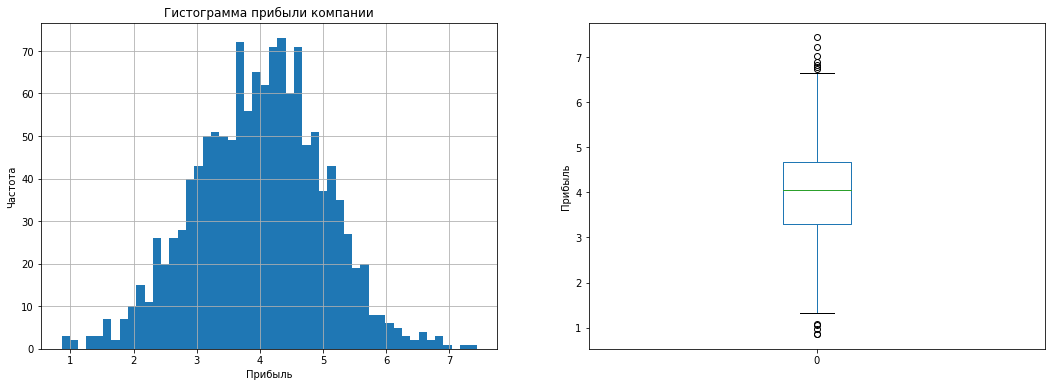

count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64

In [30]:
# Строим гистограмму прибыли компании и boxplot диаграмму, также смотрим описание данных
plt.subplot(1, 2, 1)
money['прибыль'].hist(bins=50, figsize=(18, 6))
plt.title('Гистограмма прибыли компании')
plt.xlabel('Прибыль')
plt.ylabel('Частота')
plt.subplot(1, 2, 2)
money['прибыль'].plot.box(use_index=False)
plt.ylabel('Прибыль')
plt.show()
money['прибыль'].describe()

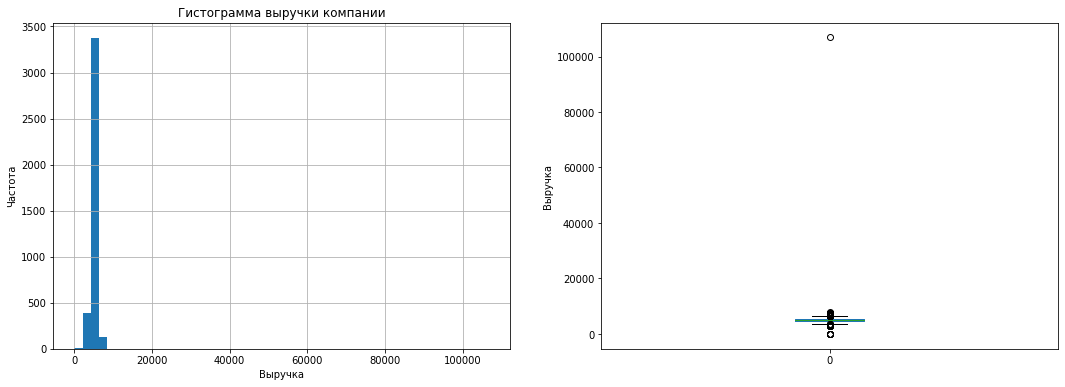

count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64

In [31]:
# Строим гистограмму выручки компании и boxplot диаграмму, также смотрим описание данных
plt.subplot(1, 2, 1)
market_money['выручка'].hist(bins=50, figsize=(18, 6))
plt.title('Гистограмма выручки компании')
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.subplot(1, 2, 2)
market_money['выручка'].plot.box(use_index=False)
plt.ylabel('Выручка')
plt.show()
market_money['выручка'].describe()

In [32]:
# Видим что есть аномально большое значение выручки, а также клиенты с нулевой выручкой
market_money.loc[
    (market_money['выручка'] >= 100000) 
    | (market_money['выручка'] == 0)
]

,id,период,выручка
0,215348,предпредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,предпредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,предпредыдущий_месяц,0.0
98,215380,текущий_месяц,106862.2


In [33]:
# Удаляем аномально большие и нулевые данные о выручке
market_money = (
    market_money
    .loc[
        (market_money['выручка'] != 106862.2) 
        & (market_money['выручка'] != 0)
    ]
)

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



Действительно это выброс, а значит нам нужно с ним что-то сделать, иначе модель будут пытаться подстроиться под него вместо того чтобы улавливать общую тенденцию


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Удалил аномально большие и нулевые данные о выручке </font>
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍 Как вариант


 

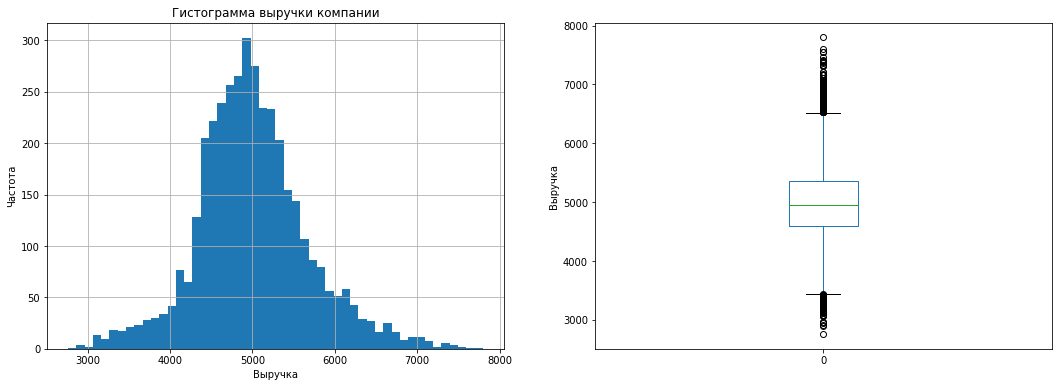

count    3893.000000
mean     5007.282918
std       679.724898
min      2758.700000
25%      4592.000000
50%      4959.000000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64

In [34]:
# Строим гистограмму выручки компании и boxplot диаграмму, также смотрим описание данных без учета 
# нулевых и аномально большого значения выручки
plt.subplot(1, 2, 1)
market_money['выручка'].hist(bins=50, figsize=(18, 6))
plt.title('Гистограмма выручки компании')
plt.xlabel('Выручка')
plt.ylabel('Частота')
plt.subplot(1, 2, 2)
market_money['выручка'].plot.box(use_index=False)
plt.ylabel('Выручка')
plt.show()
market_money['выручка'].describe()

In [35]:
# Считаем процент данных о выручке за предпредыдущий месяц
perc_prevprev_one = round(
    market_money.loc[market_money['период'] == 'предпредыдущий_месяц']['выручка']
    .count() / market_money['выручка'].count() * 100, 2
)
# Считаем процент данных о выручке за предыдущий месяц
perc_prev_one = round(
    market_money.loc[market_money['период'] == 'предыдущий_месяц']['выручка']
    .count() / market_money['выручка'].count() * 100, 2
)
# Считаем процент данных о выручке за текущий месяц
perc_curr_one = round(
    market_money.loc[market_money['период'] == 'текущий_месяц']['выручка']
    .count() / market_money['выручка'].count() * 100, 2
)

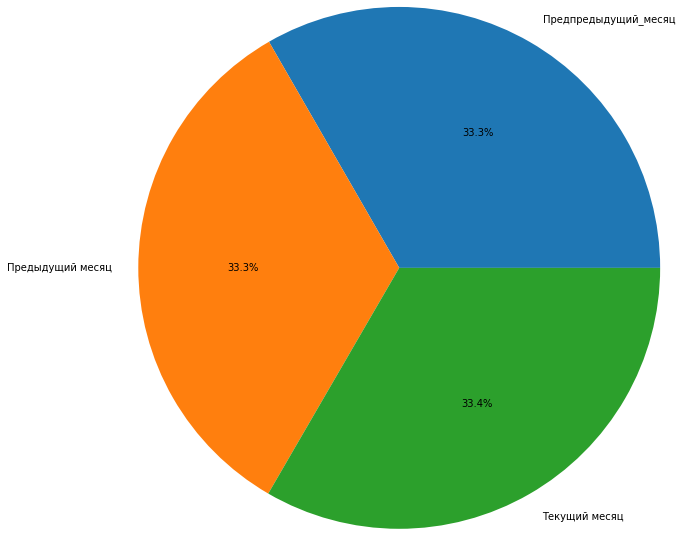

In [36]:
# Строим пай-диаграму данных о выручке за текущий и за предыдуший месяцы
plt.pie([perc_prevprev_one, perc_prev_one, perc_curr_one], labels = ['Предпредыдущий_месяц', 'Предыдущий месяц', 'Текущий месяц'], radius=3, autopct='%1.1f%%')
plt.show()

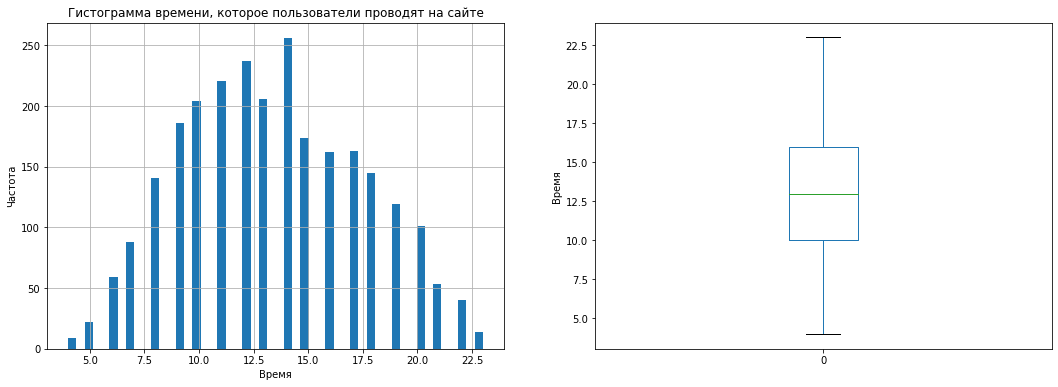

count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64

In [37]:
# Строим гистограмму времени, которое пользователи проводят на сайте и boxplot диаграмму, также смотрим описание данных
plt.subplot(1, 2, 1)
market_time['минут'].hist(bins=50, figsize=(18, 6))
plt.title('Гистограмма времени, которое пользователи проводят на сайте')
plt.xlabel('Время')
plt.ylabel('Частота')
plt.subplot(1, 2, 2)
market_time['минут'].plot.box(use_index=False)
plt.ylabel('Время')
plt.show()
market_time['минут'].describe()



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>


Совет:

    
- для гистограмм по выручке и минутам, стоит предварительно сделать группировку по "период" (у нас будет 3 графика по выручке и 2 по минутам), это разумно, ведь именно в таком виде мы используем их      

In [38]:
# Считаем процент данных о времени, которое пользователи проводят на сайте, за предыдущий месяц
perc_prev_two = round(
    market_time.loc[market_time['период'] == 'предыдущий_месяц']['период']
    .count() / market_time['период'].count() * 100, 2
)
# Считаем процент данных о времени, которое пользователи проводят на сайте, за текущий месяц
perc_curr_two = round(
    market_time.loc[market_time['период'] == 'текущий_месяц']['период']
    .count() / market_time['период'].count() * 100, 2
)

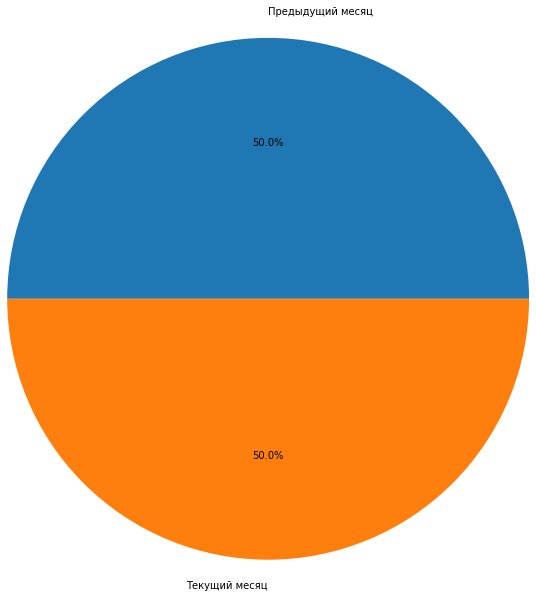

In [39]:
# Строим пай-диаграму данных о времени, которое пользователи проводят на сайте, за текущий и за предыдуший месяцы
plt.pie([perc_prev_two, perc_curr_two], labels = ['Предыдущий месяц', 'Текущий месяц'], radius=3, autopct='%1.1f%%')
plt.show()

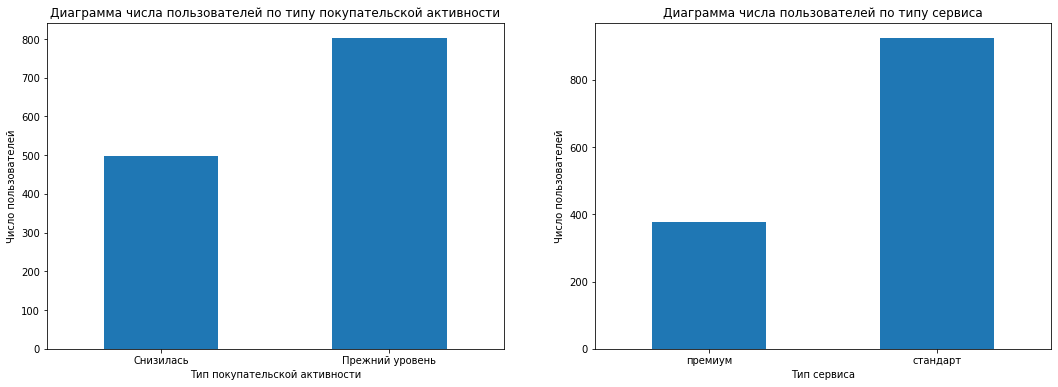

In [40]:
# Строим диаграмму числа пользователей по типу покупательской активности
plt.subplot(1, 2, 1)
(
    market_file.groupby('покупательская_активность')['покупательская_активность']
    .count().sort_values().plot(kind='bar', legend=False, figsize=(18, 6))
)
plt.title('Диаграмма числа пользователей по типу покупательской активности')
plt.xlabel('Тип покупательской активности')
plt.ylabel('Число пользователей')
plt.xticks(rotation=0)
# Строим диаграмму числа пользователей по типу сервиса
plt.subplot(1, 2, 2)
(
    market_file.groupby('тип_сервиса')['тип_сервиса']
    .count().sort_values().plot(kind='bar', legend=False)
)
plt.title('Диаграмма числа пользователей по типу сервиса')
plt.xlabel('Тип сервиса')
plt.ylabel('Число пользователей')
plt.xticks(rotation=0)
plt.show()

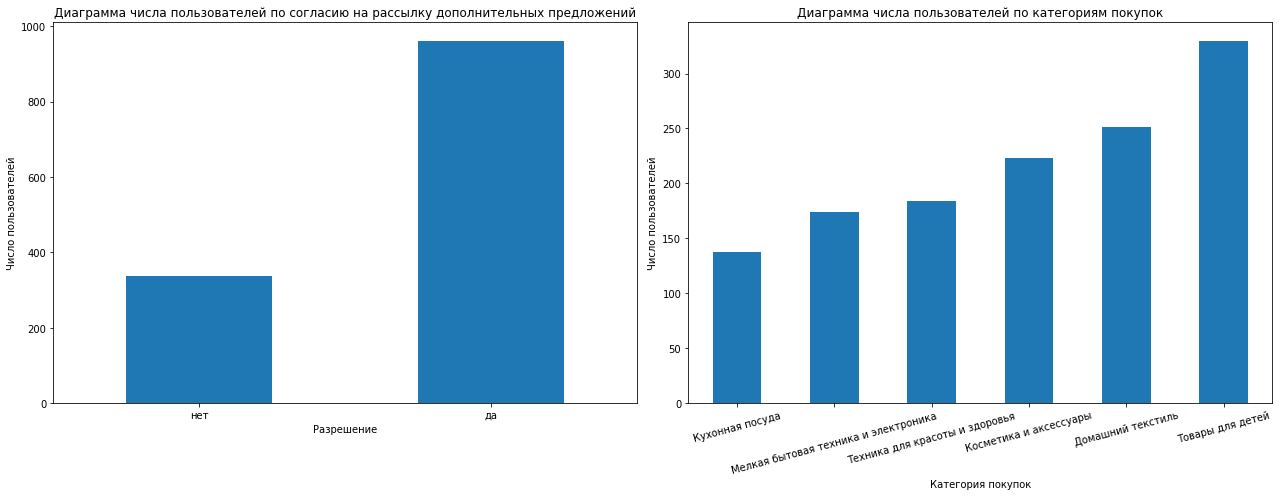

In [41]:
# Строим диаграмму числа пользователей по согласию на рассылку дополнительных предложений
plt.subplot(1, 2, 1)
(
    market_file.groupby('разрешить_сообщать')['разрешить_сообщать']
    .count().sort_values().plot(kind='bar', legend=False, figsize=(18, 7))
)
plt.title('Диаграмма числа пользователей по согласию на рассылку дополнительных предложений')
plt.xlabel('Разрешение')
plt.ylabel('Число пользователей')
plt.xticks(rotation=0)
# Строим диаграмму числа пользователей по категориям покупок
plt.subplot(1, 2, 2)
(
    market_file.groupby('популярная_категория')['популярная_категория']
    .count().sort_values().plot(kind='bar', legend=False)
)
plt.title('Диаграмма числа пользователей по категориям покупок')
plt.xlabel('Категория покупок')
plt.ylabel('Число пользователей')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

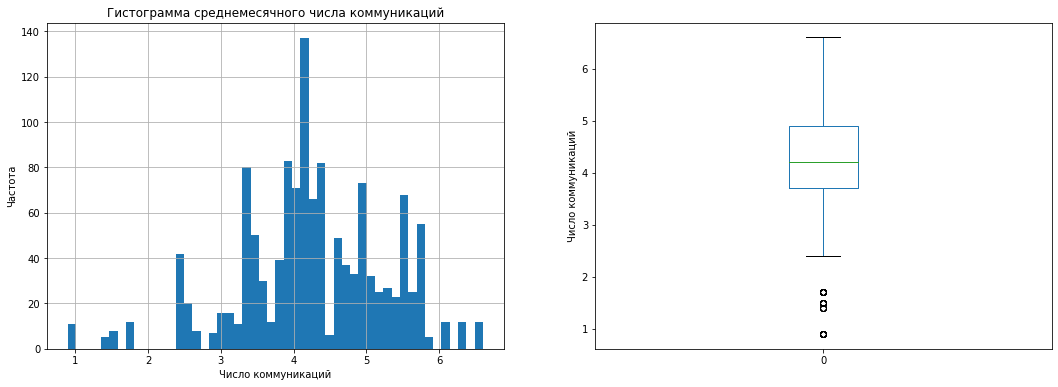

count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64

In [42]:
# Строим гистограмму среднемесячного числа коммуникаций с клиентом за 6 месяцев и boxplot диаграмму,
# также смотрим описание данных
plt.subplot(1, 2, 1)
market_file['маркет_актив_6_мес'].hist(bins=50, figsize=(18, 6))
plt.title('Гистограмма среднемесячного числа коммуникаций')
plt.xlabel('Число коммуникаций')
plt.ylabel('Частота')
plt.subplot(1, 2, 2)
market_file['маркет_актив_6_мес'].plot.box(use_index=False)
plt.ylabel('Число коммуникаций')
plt.show()
market_file['маркет_актив_6_мес'].describe()

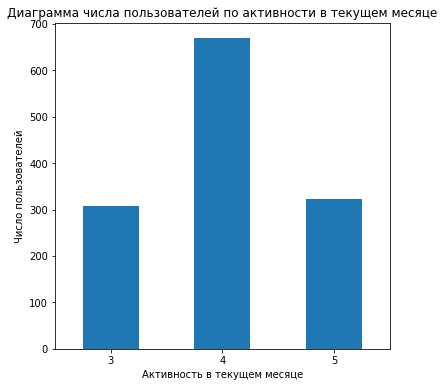

In [43]:
# Строим диаграмму числа пользователей по активности в текущем месяце
(
    market_file.groupby('маркет_актив_тек_мес')['маркет_актив_тек_мес']
    .count().plot(kind='bar', legend=False, figsize=(6, 6))
)
plt.title('Диаграмма числа пользователей по активности в текущем месяце')
plt.xlabel('Активность в текущем месяце')
plt.ylabel('Число пользователей')
plt.xticks(rotation=0)
plt.show()

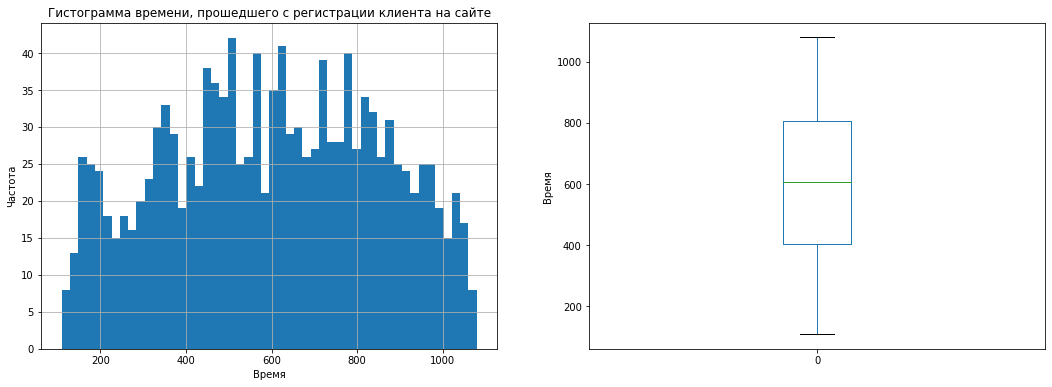

count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64

In [44]:
# Строим гистограмму времени, прошедшего с регистрации клиента на сайте boxplot диаграмму, также смотрим описание данных
plt.subplot(1, 2, 1)
market_file['длительность'].hist(bins=50, figsize=(18, 6))
plt.title('Гистограмма времени, прошедшего с регистрации клиента на сайте')
plt.xlabel('Время')
plt.ylabel('Частота')
plt.subplot(1, 2, 2)
market_file['длительность'].plot.box(use_index=False)
plt.ylabel('Время')
plt.show()
market_file['длительность'].describe()

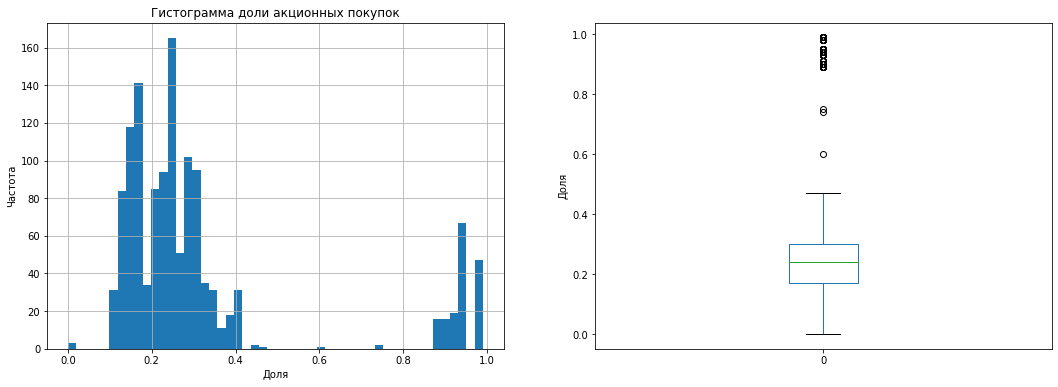

count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64

In [45]:
# Строим гистограмму доли акционных покупок и boxplot диаграмму, также смотрим описание данных
plt.subplot(1, 2, 1)
market_file['акционные_покупки'].hist(bins=50, figsize=(18, 6))
plt.title('Гистограмма доли акционных покупок')
plt.xlabel('Доля')
plt.ylabel('Частота')
plt.subplot(1, 2, 2)
market_file['акционные_покупки'].plot.box(use_index=False)
plt.ylabel('Доля')
plt.show()
market_file['акционные_покупки'].describe()

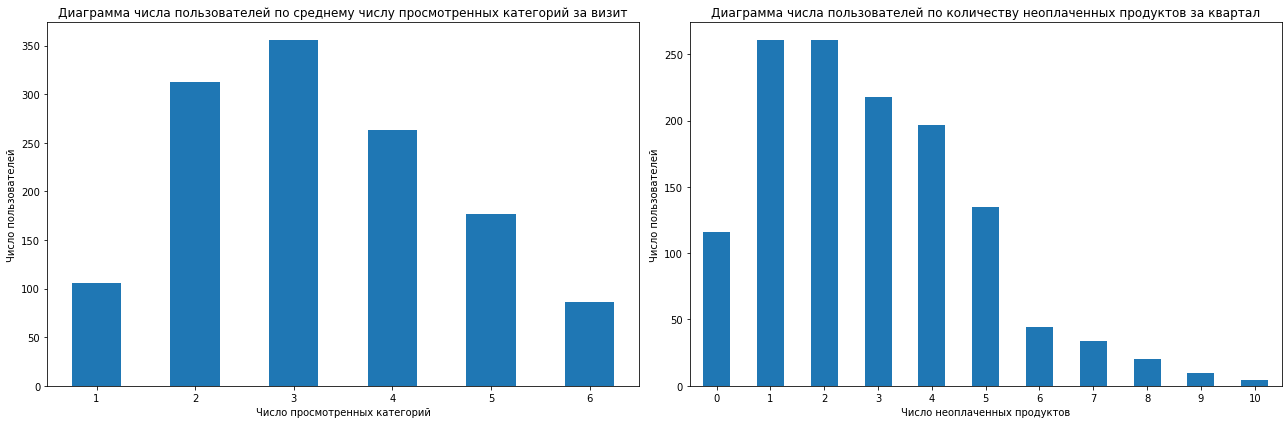

In [46]:
# Строим диаграмму числа пользователей по среднему числу просмотренных категорий за визит
plt.subplot(1, 2, 1)
(
    market_file.groupby('средний_просмотр_категорий_за_визит')['средний_просмотр_категорий_за_визит']
    .count().plot(kind='bar', legend=False, figsize=(18, 6))
)
plt.title('Диаграмма числа пользователей по среднему числу просмотренных категорий за визит')
plt.xlabel('Число просмотренных категорий')
plt.ylabel('Число пользователей')
plt.xticks(rotation=0)
# Строим диаграмму числа пользователей по количеству неоплаченных продуктов за квартал
plt.subplot(1, 2, 2)
(
    market_file.groupby('неоплаченные_продукты_штук_квартал')['неоплаченные_продукты_штук_квартал']
    .count().plot(kind='bar', legend=False)
)
plt.title('Диаграмма числа пользователей по количеству неоплаченных продуктов за квартал')
plt.xlabel('Число неоплаченных продуктов')
plt.ylabel('Число пользователей')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

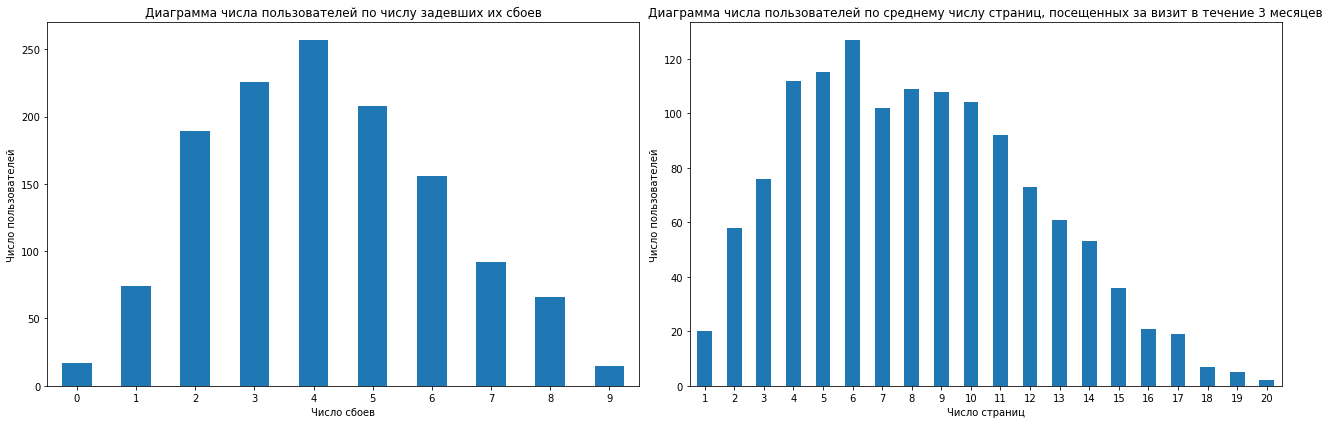

In [47]:
# Строим диаграмму числа пользователей по числу задевших их сбоев
plt.subplot(1, 2, 1)
(
    market_file.groupby('ошибка_сервиса')['ошибка_сервиса']
    .count().plot(kind='bar', legend=False, figsize=(18, 6))
)
plt.title('Диаграмма числа пользователей по числу задевших их сбоев')
plt.xlabel('Число сбоев')
plt.ylabel('Число пользователей')
plt.xticks(rotation=0)
# Строим диаграмму числа пользователей по среднему числу страниц, посещенных за визит в течение 3 месяцев
plt.subplot(1, 2, 2)
(
    market_file.groupby('страниц_за_визит')['страниц_за_визит']
    .count().plot(kind='bar', legend=False)
)
plt.title('Диаграмма числа пользователей по среднему числу страниц, посещенных за визит в течение 3 месяцев')
plt.xlabel('Число страниц')
plt.ylabel('Число пользователей')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Промежуточный вывод:** 
* Прибыль компании распределена нормально, есть выбросы значений с обеих сторон.   
* Выручка компании от клиентов распределена нормально, есть аномально большое значение выручки и клиенты с нулевой выручкой.
* Соотношение данных о выручке за предыдущий и текущий месяцы - 2 к 1.
* Время, проведенное клиентами на сайте распределено нормально.
* Соотношение данных о времени, проведенном клиентами на сайте за предыдущий и текущий месяцы - 1 к 1.
* У примерно 800 клиентов активность не изменилась, у 500 клиенктов активность снизилась.
* Соотношение клиентов использующих стандартный и премиум сервис примерно 2 к 1.
* Большая часть клиентов разрешает сообщать о дополнительных предложениях.
* Большая часть пользователей интересуется товарами для детей, меньшая кухонной посудой.
* Среднее число коммуникаций с клиентами распределено нормально, есть выбросы низких средних чисел коммуникации.
* В текущий месяц числа коммуникаций с клиентами 3, 4 и 5 в соотношении 1 к 2 к 1.
* Время, прошедшее с момента регистрации распределено равномерно по числу пользователей.
* Доля акционных покупок распределена нормально, есть выбросы со стороны высокой доли числа акционных покупок.
* Среднее число просмотренных за визит категорий распределено нормально, с максимумом на 3 категориях.
* Число неоплаченных пользователями за квартал продуктов распределено со смещением к нулю, с максимумом на 1 и 2.
* Число ошибок сервиса, с которыми сталкиваются пользователи распределено нормально/
* Число страниц, которые посещает пользователь за визит распределено нормально, с абсолютным максимумом на 6 страницах. Можно наблюдать наличие второго максимума на 8 страницах.

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

 
	
	
- Правильно что продолжаешь практику с прошлого проекта и строишь 2 типа графиков для количественных признаков 
    
 

- Для  разных типов данных используешь  соответствующие графики
     
    
    
- Есть выводы по увиденному
 
 


<div class="alert alert-warning">


Совет 🤔:

   
- можно пойти дальше  и для графиков распределений сделать разбивку по таргету. Так мы можем получить дополнительную информацию для лучшего понимания наших данные, может что-то пригодится для раздела сегментации. Если использовать seaborn, это можно сделать с помощью аргумента [hue](https://www.statology.org/seaborn-histogram-hue/). В результате мы получим наложенные (в разбивки по таргету) 2 гистограммы (boxplot тоже неплохо добавить) для каждого количественного признака. И о категориальных незабываем. Будет красиво и информативно.
 

 
- подумай о лучшем размещении графиков, сейчас это длинный ряд графиков, который надо прокручивать вниз, почему бы не использовать [subplots](https://nagornyy.me/it/vizualizatsiia-dannykh-v-matplotlib/) и не разместить графики еще и по вертикали в два или три столбца!? Или например для количественных признаков -  столбец гистограммы, другой boxplot

    
- а ещё бы  посоветовал использовать библиотеку    [seaborn](https://nagornyy.me/it/vizualizatsiia-dannykh-v-seaborn/), она строит  симпатичнее и проще matplotlib. Использовать matplotlib это как выучиться на механике, но если умеешь на механике но на автомате (seaborn) точно получится. Есть небольшие отличия в названиях графиках, и фнкциональных возможностях, но это мелочи
      


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Переделал расположение графиков, таким образом чтобы рядом расположенные графики были сходи по смысловой нагрузке.</font>
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Прекрасно.   Теперь нет огромной простыни из графиков которую надо прокручивать, всё компактно и легче анализировать


 

<a id='merge'></a>
## [Объединение данных](#start)

In [48]:
# Добавляем данные о выручке за каждый период в отдельный столбец
market_file = market_file.merge(market_money.loc[market_money['период'] == 'текущий_месяц'][['id', 'выручка']], on='id')
market_file = market_file.merge(market_money.loc[market_money['период'] == 'предыдущий_месяц'][['id', 'выручка']], on='id')
market_file = market_file.merge(market_money.loc[market_money['период'] == 'предпредыдущий_месяц'][['id', 'выручка']], on='id')
market_file.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_x,выручка_y,выручка
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4971.6,5216.0,4472.0
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5058.4,5457.5,4826.0
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610.4,6158.0,4793.0
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5872.5,5807.5,4594.0
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5388.5,4738.5,5124.0


In [49]:
# Переименовываем получившиеся столбцы
columns = {
    'выручка_x':'выручка_за_тек_мес',
    'выручка_y':'выручка_за_пред_мес',
    'выручка':'выручка_за_предпред_мес'
}
market_file = market_file.rename(columns=columns)

In [50]:
# Добавляем данные о времени, проведенном на сайте пользователями за каждый период
market_file = market_file.merge(market_time.loc[market_time['период'] == 'текущий_месяц'][['id', 'минут']], on='id')
market_file = market_file.merge(market_time.loc[market_time['период'] == 'предыдущий_месяц'][['id', 'минут']], on='id')
market_file.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_за_тек_мес,выручка_за_пред_мес,выручка_за_предпред_мес,минут_x,минут_y
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4971.6,5216.0,4472.0,10,12
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5058.4,5457.5,4826.0,13,8
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6610.4,6158.0,4793.0,13,11
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5872.5,5807.5,4594.0,11,8
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5388.5,4738.5,5124.0,10,10


In [51]:
# Переименовываем получившиеся столбцы
columns = {
    'минут_x':'минут_за_тек_мес',
    'минут_y':'минут_за_пред_мес'
}
market_file = market_file.rename(columns=columns)

In [52]:
# Находим пользователей, которые не совершали покупки в предыдущем и предпредыдущем месяцах
market_file.loc[(market_file['выручка_за_пред_мес'] == 0) | (market_file['выручка_за_предпред_мес'] == 0)]

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_за_тек_мес,выручка_за_пред_мес,выручка_за_предпред_мес,минут_за_тек_мес,минут_за_пред_мес


In [53]:
# Устанавливаем столбец 'id' как индекс, чтобы он не учитывался при расчете коэффициентов корреляции и
# при моделировании
market_file = market_file.set_index('id')

**Таких пользователей уже нет в датасете, т.к. они были удалены вместе с потзователем с аномальным значением выручки на этапе исследовательского анализа данных.**

In [54]:
# Проверяем финальную инофрмацию о датасете
market_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1296 non-null   object 
 1   тип_сервиса                          1296 non-null   object 
 2   разрешить_сообщать                   1296 non-null   object 
 3   маркет_актив_6_мес                   1296 non-null   float64
 4   маркет_актив_тек_мес                 1296 non-null   int64  
 5   длительность                         1296 non-null   int64  
 6   акционные_покупки                    1296 non-null   float64
 7   популярная_категория                 1296 non-null   object 
 8   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 10  ошибка_сервиса                       1296 non-null   int64  
 11  страниц_за_визит       

**Промежуточный вывод:** 
* Данные объединены в соответствии с заданием
* Из итоговой таблицы удалены пользователи, не совершавшие покупок в течение предыдущего и предпредыдущего месяцев

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- данные для моделирования подготовлены верно


- не активные клиенты убраны

 

<div class="alert alert-warning">


Совет 🤔:



 
Ты очень сложно поворачиваешь строки в чтолбцы. альтернатива использовать [pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html). [Вот примеры использования](https://dfedorov.spb.ru/pandas/%D0%A1%D0%B2%D0%BE%D0%B4%D0%BD%D0%B0%D1%8F%20%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86%D0%B0%20%D0%B2%20pandas.html)

 

 

<a id='corr'></a>
## [Корреляционный анализ](#start)

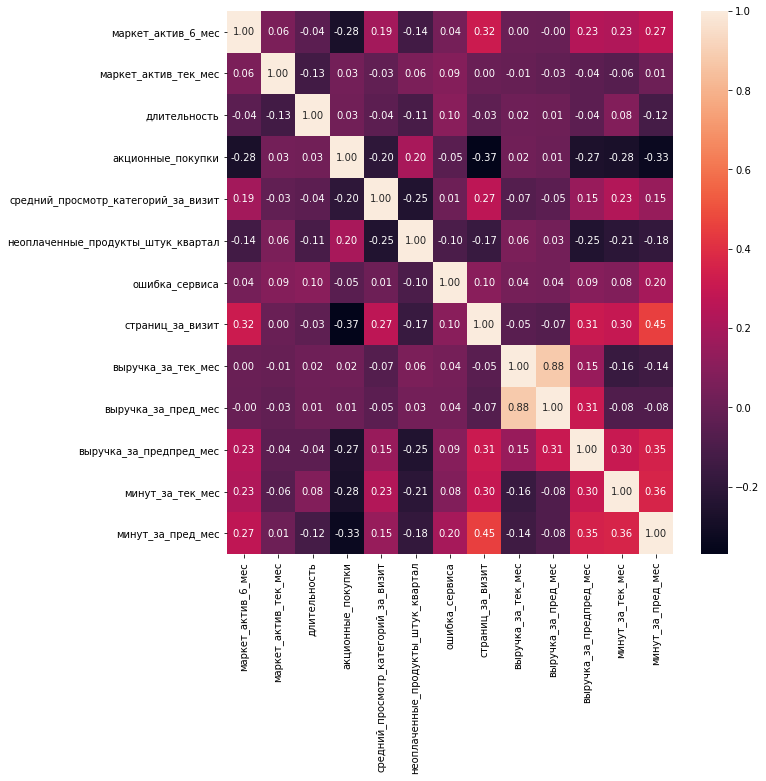

In [55]:
# Строим тепловую карту коэффициентов корреляции Пирсона
fig, ax = plt.subplots(figsize=(10, 10))
# Удалим из расчета коэффициентов id пользователей
sns.heatmap(market_file.corr(method='spearman'), annot=True, fmt='.2f', ax=ax)
plt.show()

**В матрице нет признаков с коэффициентом корреляции от 0.9 до 0.95 по модулю.  
Можно сделать вывод об отсутствии мультиколлинеарности.**

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:




 не все количественные признаки имеют нормальное распределение, а  Пирсона (по умолчанию в .corr  считается именно он) мы используем в случае нормальности распределения данных, ведь этот коэффициент чувствителен к отклонениям от нормальности (и к выбросам кстати). В случаи ненормальности в распредлении используем Спирмена       

 

<div class="alert alert-warning">


Совет: 

 
    

 
 
    

    
- к этому времени я бы уже убрал id (сделав из него индекс), ведь это  номер строки и вряд ли онполезен для анализа или прогноза. Но раз посчитал можешь педложить версию такой высокой корреляции? И что произойдёт если мы его используем в качестве признака?

 
    
- для разнообразия можно провести проверку на мультиколлинеарность с помощью VIF
 


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Исправил методику расчета коэффициентов корреляции.</font>
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Кстати у нас Target категориальный, но всё равно было бы интересно посмотреть на корреляцию.  До этого есть специальная библиотека phik,  она может измерять корреляцию даже между количественными и категориальными значениями 

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Устаноил 'id' как индекс. Ранее при расчете коэффициентов корреляции и разработке моделей я ставил drop на колонку 'id' чтобы он не учитывался во всех случаях. Теперь не нужно это делать каждый раз.</font>
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



В том-то и дело, упрощаем себе жизнь


 

<a id='models'></a>
## [Разработка моделей](#start)




<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

Совет:

- лучше начать с кодирования "снизилась" единицей (судя по постановке задачи именно "снизилась" наш положительный класс), "осталось" - нулем, это можно сделать  вручную или с помощью LabelEncoder 
	
	
- какие могут быть сложности если пропустить этот момент?! Когда у нас бинарная классификация, то метрики presicion, recall, f1 (для accuracy, roc-auc тут без разницы) считаются толко по положительному классу.  Положительный класс - это тот класс который нас больше интересует.  Если мы за этим не проследим,  и метрики не по тому классу посчитаются, и scoring при подборе гиперпараметров может делаться не по тому классу что нас интересует. Кроме того,  predict_proba возвращает два столбцы, если мы  закодируем нужный класс единичкой, то будем точно знать что его вероятность это второй столбец. Вот такая путаница и проблемы могут возникнуть...Нам это надо!?   
    
    
    
	
- константа лучше оставлять сразу после импортов библиотек, как их легче будет контролировать и изменять при надобности 
    
    
    RANDOM_STATE = 42
    TEST_SIZE = 0.25



In [56]:
# Подготавливаем данные для моделирования
# Установим RANDOM_STATE = 42
RANDOM_STATE = 42
# Разделим датасет на датасеты с входными и целевым признаком
X_train, X_test, y_train, y_test = train_test_split(
    market_file.drop(['покупательская_активность'], axis=1),
    market_file['покупательская_активность'],
    random_state = RANDOM_STATE,
    stratify = market_file['покупательская_активность']
)
# Создаем список категориальных признаков
cat_col_names = X_train.select_dtypes(exclude='number').columns.tolist()
cat_col_for_ohe = [cat_col_names[2]]
cat_col_for_ord = [cat_col_names[0], cat_col_names[1],]
# Создаем список количественных признаков
num_col_names = X_train.select_dtypes(include='number').columns.tolist()
# Подготовим список категорий для Ordinal-кодирования
categories = [X_train[cat_col_for_ord[0]].unique(), X_train[cat_col_for_ord[1]].unique()]

In [57]:
# Выводим какие категории будут кодироваться OneHotEncoder
print('Для ohe-кодирования выбрана колонка -', cat_col_for_ohe)

Для ohe-кодирования выбрана колонка - ['популярная_категория']


In [58]:
print('Для ord-кодирования выбраны колонки -', cat_col_for_ord)

Для ord-кодирования выбраны колонки - ['тип_сервиса', 'разрешить_сообщать']


 
	
<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:



- OrdinalEncoder можно попробовать использовать, когда значения категориального признака имеют внутренний порядок (низкий/средний/высокий, майор/полковник/генерал), иначе модель будет пытаться найти какие то порядковые отношения, которых нет. Особенно это может стать проблемой для линейной модели (Логистическая регрессии)
  
Попробуй использовать OE для тип сервиса к примеру, это не создаст фальшивые закономерности 
    
    
- Кроме того Это совершенно не информативно   
    
    
    [0:2]
    
    
Лучше указать название, или по крайней мере вывести какие столбцы ты закодировал тем    
    
 
  

<div class="alert alert-warning">



Совет 🤔:



В будущем при предобработке данных можешь учитывать следующие моменты:

    
- если у категориального признака большое количество уникальных значений, применение One-Hot Encoding может привести к большому количеству новых признаков, это усложнит работу моделей
    
- у catboost и lighgbm есть собственные инструменты работы с категориальными данными, нужно только указать какие столбца содержат категориальные данные
    
- при работе с количественными признаками для линейных и метрических (модели в которых измеряется расстояние) моделей  обязательно делаем Scaler, в отличие от моделей на основе деревьев решений, для них Scaler не нужен
        

Можешь подумать над вопросом почему для линейных моделей некорректное использование OrdinalEncoder может вызвать больше проблем чем для случайного леса  или других моделей в основе которых лежат деревья решений   



    

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Исправил методику колонки для разных типов кодирования. Добавил информацию о том, какие колонки как будут закодрированы.</font>
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Это подходит.  Так как у нас бинарное значение в этих признаках, кто не будет никакого искажения, пусть даже в разрешить_сообщать нет никакой упорядоченности 


 

In [59]:
# Создаем pipeline для ohe-кодирования
ohe_pipe = Pipeline(
    [
        ('ohe', 
         OneHotEncoder(
             drop='first', 
             handle_unknown='ignore', 
             sparse_output=False
         )
        )
    ]
)

In [60]:
# Создаем pipeline для ord-кодирования
ord_pipe = Pipeline(
    [
        ('ord', 
         OrdinalEncoder(
             categories=categories, 
             handle_unknown='use_encoded_value', 
             unknown_value=np.nan
         )
        )
    ]
)

In [61]:
# Объединяем пайплайны для кодирования и масштабирования
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, cat_col_for_ohe),
        ('ord', ord_pipe, cat_col_for_ord),
        ('num', StandardScaler(), num_col_names)
    ], 
    remainder='passthrough'
)
# Создаем лист со словарями, в которых находятся модели и наборы гиперпараметров
param_grid = [
    {
        'models': [DecisionTreeClassifier(
            random_state=RANDOM_STATE
        )],
        'models__max_depth': range(2, 5),
        'models__max_features': range(2, 5),
        'preprocessor__num': [
            StandardScaler(), MinMaxScaler(), 
            RobustScaler(), 'passthrough'
        ]  
    },
    
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [
            StandardScaler(), MinMaxScaler(), 
            RobustScaler(), 'passthrough'
        ]   
    },
    
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear', 
            penalty='l1'
        )],
        'models__C': range(2, 5),
        'preprocessor__num': [
            StandardScaler(), MinMaxScaler(), 
            RobustScaler(), 'passthrough'
        ]  
    },
    
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3],
        'models__gamma': [0.1, 0.5, 1, 1.5, 2, 2.5, 3],
        'preprocessor__num': [
            StandardScaler(), MinMaxScaler(), 
            RobustScaler(), 'passthrough'
        ]   
    }
]

In [62]:
# Объединяем пайплайны предобработки и моделирования в фильнальный пайплайн
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(
            random_state=RANDOM_STATE
        )
        )
    ]
)

**В качестве метрики используем roc_auc_score. Эта метрика позволяет оценить качество моделей учитывая все пороговые значения, а также эта метрика не чувствительна к дисбалансу значений целевого класса, который наблюдается у используемого в работе датасета.**

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



👍 Обосновал


 

In [63]:
# Создаем объект класса GridSearchCV для поиска оптимальной модели и гиперпараметров
grid = GridSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
)
# Обучаем grid на тренировочных данных
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['популярная_категория']),
                                                                        ('ord',
                                                                         Pipeline(steps=[('ord',
                                                                                          OrdinalEncoder(categories=[array(['стандарт', 'премиум'], dtype=object),
                                                                                                                     arr...
                                                        solver='liblinear')],
                          'models__C': range(2, 5),
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']},
                         {'models': [SVC(probability=True, random_state=42)],
                          'models__C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3],
                          'models__gamma': [0.1, 0.5, 1, 1.5, 2, 2.5, 3],
                          'preprocessor__num': [StandardScaler(),
                                                MinMaxScaler(), RobustScaler(),
                                                'passthrough']}],
             scoring='roc_auc')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


- pipelines + ColumnTransformer + подбор гиперпараметров 
- 'passthrough' не забыт
- drop='first’ указан
- 2 способа масштабирование и кодирования

 

<div class="alert alert-warning">


Совет 🤔:

 

- бывает полезно замерить время исполнения кода в ячейке, это можно сделать с помощью магической функции %%time или библиотеки time

   
 
- для расширения кругозора: GridSearch/RandomizedSearch это классика, но есть и другие варианты подбора гиперпараметров, можешь [ознакомиться](https://www.freecodecamp.org/news/hyperparameter-optimization-techniques-machine-learning/). Выделю оptuna, очень много плюсов, причем изучение можно начать с [**OptunaSearchCV**](https://optuna.readthedocs.io/en/stable/reference/generated/optuna.integration.OptunaSearchCV.html). Интерфейс практически такой же, как у GridSearch/RandomizedSearch

 
 
- также можно провести оценку на адекватность прогноза, в качестве базовой используя константную. [Dummy Models](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html), это удобная обертка для константных моделей. Сразу скажу что ничего интересного там не будет, зато можно будет дополнительно покопаться в вариантах стратегий наивных моделей 


In [64]:
print(
    'Лучшая модель и её параметры:\n\n', 
    grid.best_estimator_
)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('ord',
                                                                   OrdinalEncoder(categories=[array(['стандарт', 'премиум'], dtype=object),
                                                                                         

In [65]:
print(
    'Метрика лучшей модели на кросс-валидационной выборке:', 
    round(grid.best_score_, 3)
)

Метрика лучшей модели на кросс-валидационной выборке: 0.913


**Проведем моделирование с помощью лучшей модели на тестовой выборке.**

In [66]:
# Обучим модель с лучшими гиперпараметрами
best_model = grid.best_estimator_.fit(X_train, y_train)
# Проведем предсказание на тестовой выборке
preds = best_model.predict_proba(X_test)
# Расчитаем roc_auc_score для тестовой выборки
print(
    'Метрика лучшей модели на тренировочной выборке:', 
    round(roc_auc_score(y_test, preds[:,1]), 3)
)

Метрика лучшей модели на тренировочной выборке: 0.913


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Только не на тренировочный а на тестовой 

<a id='importance'></a>
## [Анализ важности признаков](#start)


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:




Это переносим в предыдущий раздел.  Кроме того проводим финальное тестирование вашей лучшей модели (Иначе зачем мы создавали тестовую выборку?!)
 

	

<div class="alert alert-warning">


    print('Метрика лучшей модели на тренировочной выборке:', round(grid.best_score_, 2))
	
    
- Это звучит  не очень хорошо с точки зрения теории. Ведь .best_score_ это метрика по кросс валидацинной выборке а не на тренировочной. Мы не выбираем лучшую модель по результату на тренировочный выборке, потому что она ничего не показывает. Например если взять дерево решение достаточно большой глубины, то метрика на тренировочной будет равна 100%, но это результат запоминание данных, а не обобщения. Раньше был проект "ведения машинное обучение", где чётко об этом рассказывалось - обучаемся на train, гиперпараметры подбираем по валидационной выборке (в случаи GS кроссвалидационной), а затем проводим финальное тестирование. В прежнем проекте студенты вручную разбивали на три выборки и в цикле подбирали гиперпараметры, а сейчас сразу GS, но он делает то же самое: ты подаёшь него X_train, и он внутри себя разбивает его на тренировочную и валидационную (причем несколько раз)... Можешь посмотреть [тут](https://towardsdatascience.com/why-do-we-need-a-validation-set-in-addition-to-training-and-test-sets-5cf4a65550e0) с помощью VPN о логике использования выборок. Может конечно не исправлять,  но хотя бы обрати внимание на логику использования выборок,  и как работает RandomizedSearchCV/GridSearchCV 



<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Перевел всё в нужный раздел. Добавил тестирование лучшей модели на тестовой выборке.</font>
</div>

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


ты правильно почитал метрику, осталось только перенести расчёт в соответствующий раздел (и для этого не нужно будет разбивать pipeline на части) 

In [67]:
# С помощью shap создаем Explainer для модели
explainer = shap.Explainer(
    best_model[1].predict_proba, 
    best_model[0].transform(X_test), 
    feature_names=best_model[0].get_feature_names_out()
)

In [68]:
# Расчитываем shap_values 
shap_values = explainer(best_model[0].transform(X_test))

PermutationExplainer explainer: 325it [12:06,  2.25s/it]                         


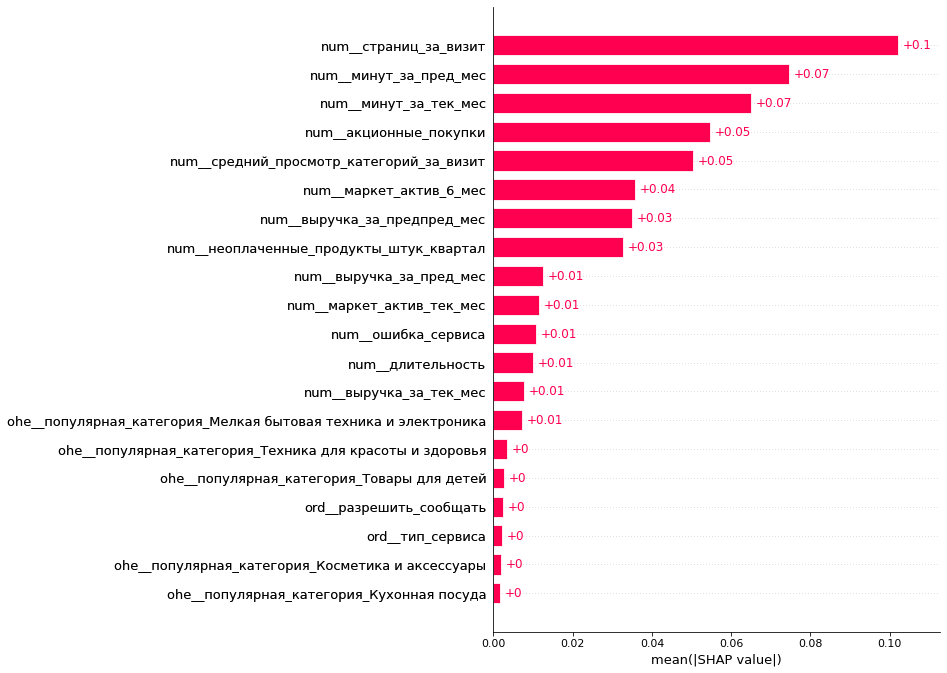

In [69]:
# Строим диаграмму важности признаков
shap.plots.bar(shap_values[:, :, 1], max_display=20)

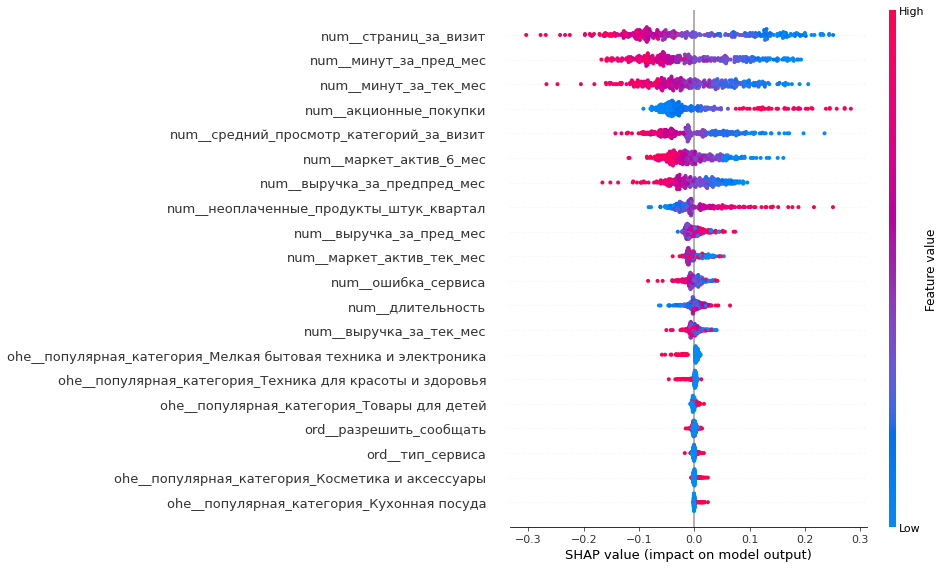

In [70]:
# Строим диаграмму важности признаков
shap.plots.beeswarm(shap_values[:, :, 1], max_display=20)

**Промежуточный вывод:** 
* Самыми важными признаками являются количество страниц, которые посещает пользователь за визит, доля акционных покупок, а также время, которое пользователи проводят на сайте в текущий и предыдущие месяцы.
* На активность пользователей мало влияют тип сервиса, разрешение на рассылку дополнительной информации и то, как давно они зарегистрировались на сайте.
* Исходя из beeswarm диаграммы можно сказать, что чем меньше страниц пользователь посещает за визит, тем выше целевой показатель.
* Тоже самае можно сказать о времени, которое пользователи проводят на сайте в текущий и предыдущий месяцы.
* Исходя из beeswarm диаграммы можно сказать, что чем больше акций и неоплаченных товаров за квартал , тем выше целевой показатель.

  
    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- есть график важности факторов, график аккуратный
    
    
- есть выводы о том, какие факторы сильнее/слабее влияют
  
  
    
<div class="alert alert-warning">


Совет 🤔:
   
 
     
     Исходя из признаков с высокой важностью нужно мотивировать пользователя посещать больше страниц и проводить больше времени на сайте. Также могут быть полезны новые акции.

- Откуда ты знаешь направление связи? Если хочешь узнать, то есть используй  .beeswarm, чтобы можно посмотреть какая именно связь между факторами и таргетом (Положительая или отрицательная). это и для сегментирования даст дополнительную информацию
           
	
- можно и по-другому оценить важность признаков, это можно сделать с помощью [.feature_importance](https://inria.github.io/scikit-learn-mooc/python_scripts/dev_features_importance.html) (но не забываем что в логистической регрессии надо учесть логарифм в функция ошибки). Или с помощью [Permutation Importance](https://scikit-learn.org/stable/modules/permutation_importance.html) Если сделать, то должно получиться что-то похожее	
	
 



<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Построил beeswarm диаграмму. Если я правильно понял, как ее интерпретировать, то получаются противоположные выводы.</font>
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



Верно.  Поэтому  на основании shap трудно делать вывод что нам нужно увеличивать акции, ведь beeswarm  Показалось что Чем выше акционные продажи тем больше вероятность что активность снизится.  Это не значит что такую рекомендацию не стоит делать, но её точно не стоит делать на основе анализа shap


 

<a id='segment'></a>
## [Анализ пользователей сервиса](#start)

**Так как у нас есть данные тестового моделирования сформируем датасет с предсказаниями активности клиентов и их прибыльностью ждя компании на основе датасета X_test. Далее разделим этот датасет на сегмент с пользователями с высокой прибыльносью, у которых предсказанная активность остается на прежнем уровне и на сегмент с пользователями, у которых активность должна снизиться.**

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Совет 🤔:


Тут лучше указать что магазин коммерческой организации, поэтому стоит Выделить прибыльных клиентов.  И лучше сконцентрироваться на клиентах для которых модель предсказывает снижение активности, ведь удержать старый проще чем привлечь новых... Вот так можно было аргументировать 

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет:



 
Начинаем раздел с описания сегмента  и объяснения почему мы его выбрали 

In [71]:
# Предсказывает активность клиентов
y_preds = best_model.predict(X_test)
# Добавляем к датасету X_test полученные предсказания 
X_test['предсказанная активность'] = y_preds

In [72]:
# Добавляем в X_test информацию о прибыльности клиентов
X_test = X_test.merge(money, on='id')
# Проверяем полученый датасет
X_test.info()
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 323
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   324 non-null    int64  
 1   тип_сервиса                          324 non-null    object 
 2   разрешить_сообщать                   324 non-null    object 
 3   маркет_актив_6_мес                   324 non-null    float64
 4   маркет_актив_тек_мес                 324 non-null    int64  
 5   длительность                         324 non-null    int64  
 6   акционные_покупки                    324 non-null    float64
 7   популярная_категория                 324 non-null    object 
 8   средний_просмотр_категорий_за_визит  324 non-null    int64  
 9   неоплаченные_продукты_штук_квартал   324 non-null    int64  
 10  ошибка_сервиса                       324 non-null    int64  
 11  страниц_за_визит                

,id,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,выручка_за_тек_мес,выручка_за_пред_мес,выручка_за_предпред_мес,минут_за_тек_мес,минут_за_пред_мес,предсказанная активность,прибыль
0,216161,стандарт,да,4.1,4,606,0.15,Техника для красоты и здоровья,6,1,4,12,3289.2,3973.0,4912.0,17,16,Прежний уровень,4.69
1,215654,премиум,нет,1.4,4,684,0.94,Товары для детей,3,6,1,6,4170.7,3548.0,4656.0,9,11,Снизилась,2.75
2,216307,премиум,да,3.3,4,488,0.13,Домашний текстиль,4,2,8,10,6335.8,5444.0,4565.0,11,20,Прежний уровень,3.16
3,215501,премиум,да,3.5,3,1057,0.35,Домашний текстиль,4,3,5,6,6758.7,6604.0,4993.0,9,9,Снизилась,3.74
4,215934,стандарт,нет,5.5,4,147,0.99,Мелкая бытовая техника и электроника,1,2,3,7,5773.8,5090.0,4451.0,18,15,Прежний уровень,4.40


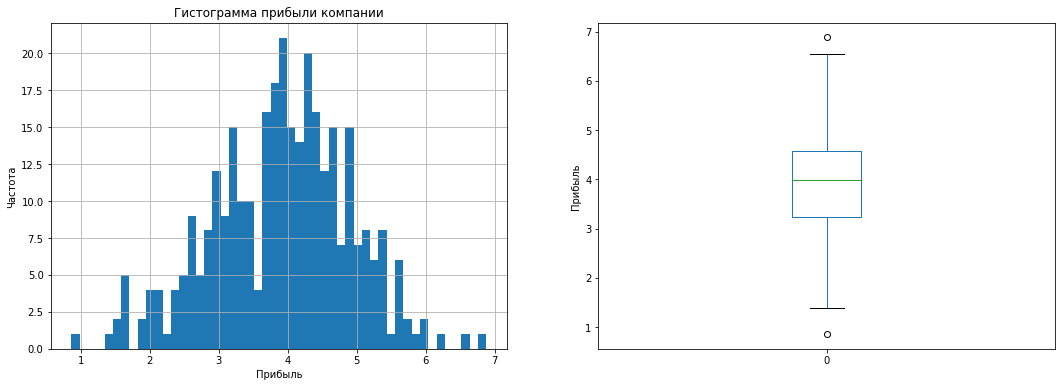

In [73]:
# Строим гистограмму прибыли компании для тестовой выборки и boxplot диаграмму
plt.subplot(1, 2, 1)
X_test['прибыль'].hist(bins=50, figsize=(18, 6))
plt.title('Гистограмма прибыли компании')
plt.xlabel('Прибыль')
plt.ylabel('Частота')
plt.subplot(1, 2, 2)
X_test['прибыль'].plot.box(use_index=False)
plt.ylabel('Прибыль')
plt.show()

**Сегментируем клиентов по средним значениям прибыльности. Это клиенты с прибылью от 3 до 5. Сразу же разделим пользователей на два датасета (со сниженной активностью и с текущей активностью).**

In [74]:
# Создаем датасет с пользователям с прибылью от 3 до 5, у которых предсказанная активность снижается
X_test_middle_low_act = (
    X_test.loc[
        (X_test['прибыль'] >= 3) 
        & (X_test['прибыль'] <= 5) 
        & (X_test['предсказанная активность'] == 'Снизилась')]
)
# Создаем датасет с пользователям с прибылью от 3 до 5, у которых предсказанная активность остается на прежнем уровне
X_test_middle_curr_act = (
    X_test.loc[
        (X_test['прибыль'] >= 3) 
        & (X_test['прибыль'] <= 5) 
        & (X_test['предсказанная активность'] == 'Прежний уровень')]
)

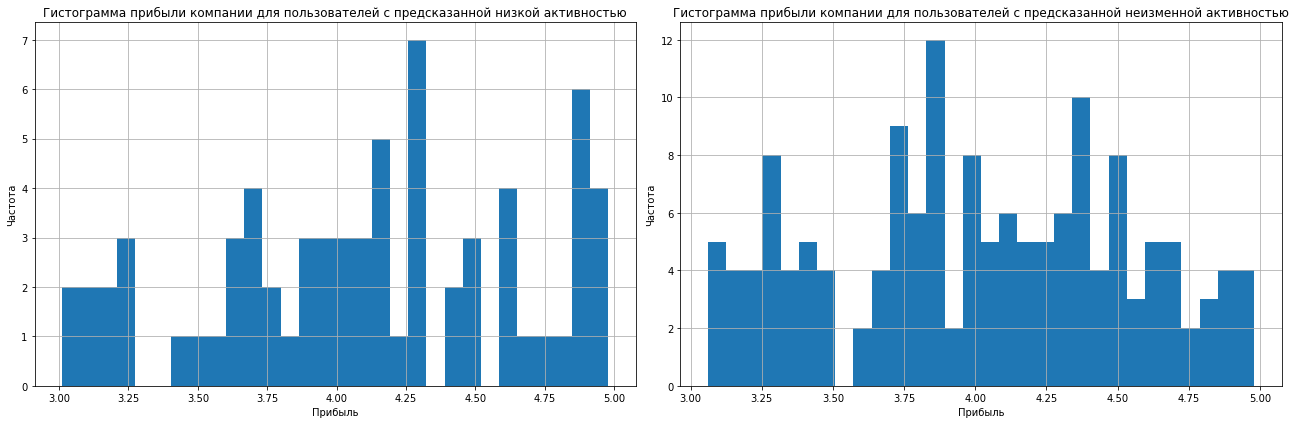

In [75]:
# Строим гистограмму прибыли компании для пользователей с предсказанной низкой активностью
plt.subplot(1, 2, 1)
X_test_middle_low_act['прибыль'].hist(bins=30, figsize=(18, 6))
plt.title('Гистограмма прибыли компании для пользователей с предсказанной низкой активностью')
plt.xlabel('Прибыль')
plt.ylabel('Частота')
plt.subplot(1, 2, 2)
# Строим гистограмму прибыли компании для пользователей с предсказанной неизменной активностью
X_test_middle_curr_act['прибыль'].hist(bins=30, figsize=(18, 6))
plt.title('Гистограмма прибыли компании для пользователей с предсказанной неизменной активностью')
plt.xlabel('Прибыль')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

**Можно увидеть, что клиентов с неизменной активностью в общем большена всем интервале прибылей. Среди клиентов с предсказанной низкой активностью заметно меньше клиентов с прибыль от 3 до 3.5.**

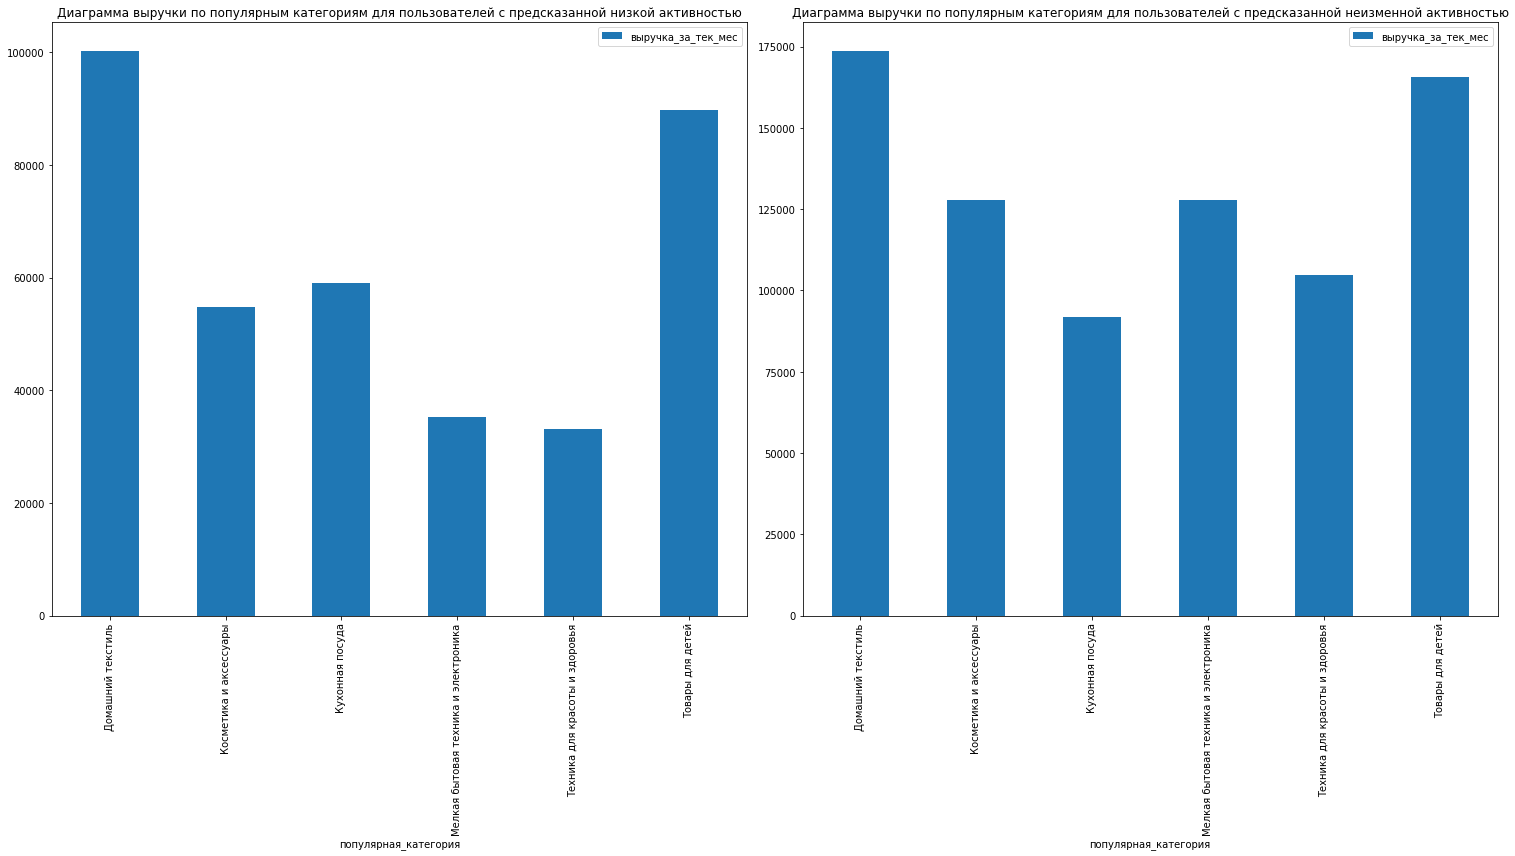

In [76]:
# Строим диаграмму выручки по популярным категориям для пользователей с предсказанной низкой активностью
# за текущий месяц
plt.subplot(1, 2, 1)
(
    X_test_middle_low_act.groupby('популярная_категория')['выручка_за_тек_мес']
    .sum().plot(kind='bar', legend=True, figsize=(21, 12))
)
plt.title('Диаграмма выручки по популярным категориям для пользователей с предсказанной низкой активностью')
# Строим диаграмму выручки по популярным категориям для пользователей с предсказанной неизменной активностью
# за текущий месяц
plt.subplot(1, 2, 2)
(
    X_test_middle_curr_act.groupby('популярная_категория')['выручка_за_тек_мес']
    .sum().plot(kind='bar', legend=True)
)
plt.title('Диаграмма выручки по популярным категориям для пользователей с предсказанной неизменной активностью')
plt.tight_layout()
plt.show()

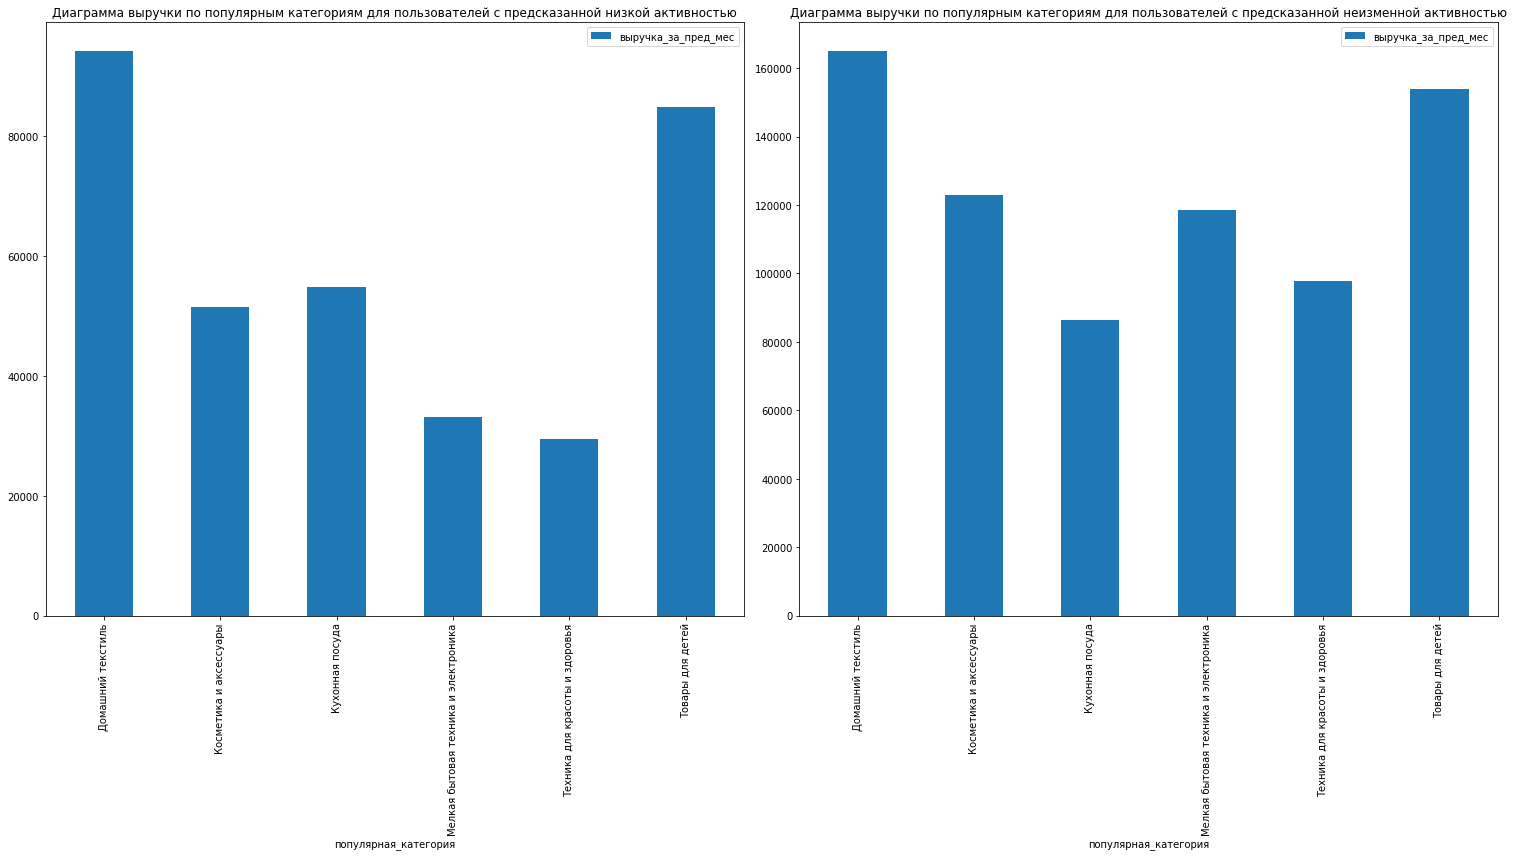

In [77]:
# Строим диаграмму выручки по популярным категориям для пользователей с предсказанной низкой активностью
# за предыдущий месяц
plt.subplot(1, 2, 1)
(
    X_test_middle_low_act.groupby('популярная_категория')['выручка_за_пред_мес']
    .sum().plot(kind='bar', legend=True, figsize=(21, 12))
)
plt.title('Диаграмма выручки по популярным категориям для пользователей с предсказанной низкой активностью')
# Строим диаграмму выручки по популярным категориям для пользователей с предсказанной неизменной активностью
# за предыдущий месяц
plt.subplot(1, 2, 2)
(
    X_test_middle_curr_act.groupby('популярная_категория')['выручка_за_пред_мес']
    .sum().plot(kind='bar', legend=True)
)
plt.title('Диаграмма выручки по популярным категориям для пользователей с предсказанной неизменной активностью')
plt.tight_layout()
plt.show()

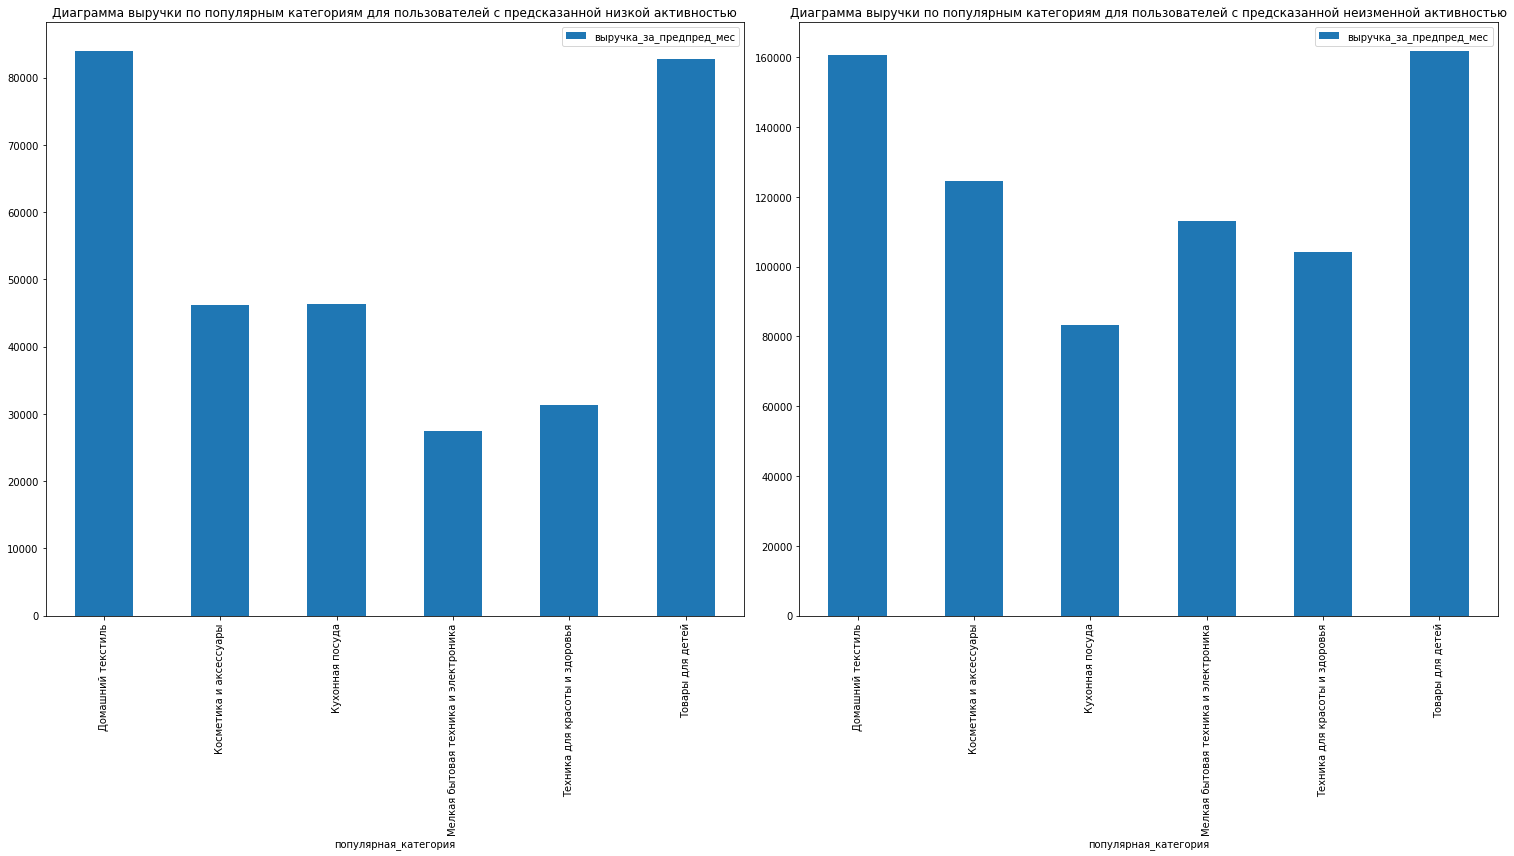

In [78]:
# Строим диаграмму выручки по популярным категориям для пользователей с предсказанной низкой активностью
# за предпредыдущий месяц
plt.subplot(1, 2, 1)
(
    X_test_middle_low_act.groupby('популярная_категория')['выручка_за_предпред_мес']
    .sum().plot(kind='bar', legend=True, figsize=(21, 12))
)
plt.title('Диаграмма выручки по популярным категориям для пользователей с предсказанной низкой активностью')
# Строим диаграмму выручки по популярным категориям для пользователей с предсказанной неизменной активностью
# за предпредыдущий месяц
plt.subplot(1, 2, 2)
(
    X_test_middle_curr_act.groupby('популярная_категория')['выручка_за_предпред_мес']
    .sum().plot(kind='bar', legend=True)
)
plt.title('Диаграмма выручки по популярным категориям для пользователей с предсказанной неизменной активностью')
plt.tight_layout()
plt.show()

* Из показанных распределений можно сделать вывод, что сегменты пользователей с малой и высокой прибыль мало интересуются бытовой техникой и техникой для красоты и здоровья.  
* Соотношения пользователей по остальным категориям в каждом сегменте похожи.


<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


Получается при сегментации ты никак не использовал информацию которую мы получили при моделировании и анализе shap. Предлагаю доработать, конкретно совет дл ниже
    

<div class="alert alert-warning">


Совет 🤔:


- самый очевидный и наверное логичный вариант - это рассмотреть сегмент клиентов с высокой вероятностью снижения покупательской активности и наиболее высокой прибыльностью. Тут сходится всё - и бизнесовая составляющая, и результаты моделирования мы используем). а потом Используй метод сравнения. А потом Используй метод сравнения, сравнивая свой сегмент с контрсегментом (Контр сегментом может выступать такие же прибыльные для нас клиенты, но для которых модель предсказывает низкую вероятность ухода)


- еще можно посмотреть на динамику выручки по месяцам, в группировке по категориальным признакам (популярная категория Товаров), возможно тут получится увидеть что то интересное и сделать какие то маркетинговые предложения. Отслеживание динамики, как и сравнение, отличный способ найти в данных что то интересное. Если посмотреть на выручки за разные месяцы в группировке по популярным товарам, то можно увидеть выручка по одной группе товаров сильно проседает

 

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Сделал сегментацию по данным модели.</font>
</div>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюераV2</b></font>



Успех 👍:



👍


(Только стоило посмотреть на признаки в разбивки по сегментам) 

<a id='conclusion'></a>
## [Общий вывод](#start)

* Целью проекта является разработка модели, которая позволила бы предсказать покупательскую активность клиентов сервиса.  
* Исходные данные полные, названия столбцов были приведены к единому стилю. По необходимости был изменен тип данных в столбцах.
* Явных дубликатов и пропусков в данных обнаружено не было, названия категорий внутри столбцов были исправлены.
* Проведем корреляционный анализ данных, на его основании был сделан вывод об отсутствии мультиколлинеарности.
* Для поиска, лучше модели был разработам пайплайн с разными вариантами кодирования и масштабирования данных и четырьмя различными моделями. С помощью модуля GridSearchCV была выявлена модель с наиболее высоким показателем ROC-AUC.
* Это модель SVC c гиперпараметрами (C=1.5, gamma=0.1, probability=True, random_state=42)  
* По итогам моделирования и анализа сегментов покупателей, рекомендуется:
 * Обратить внимание, что пользователи, которые проводят меньше времени на сайте поо статистие более активно покупают продукты.
 * Увеличивать кол-во акций в категориях "кухонная посуда", "бытовая техника" и "техника для красоты и здоровья".


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>



Владимир, у тебя старательно выполненная работа, все четко, осмысленно.  



Выводы подробные, в конце разделов есть промежуточные выводы. 
 
    
    
Я оставил небольшие советы желтым, по желанию можешь воспользоваться, в частности:

    
 
         
- хорошо бы матрицы корреляций и графики построить  в разбивке по таргету, это хороший подход если мы хотим увидеть что то дополнительно
    	
    
- поработать надо оформлением графиков, используя subplots,  seaborn вместо matplotlib     

    
- есть   более оптимальный метод  - pivot_table


 
- можно использовать библиотеку phik, чтобы посмотреть на корреляцию между признаками и нашим бинарным таргетом 
    

- закодировать "снизилась" единичкой  (это может уберечь от дальнейшей путаницы). Это можно сделать вручную, или с помощью LabelEncoder
    
	
- для market_money, market_time   стоит построить графики с учетом группировки по "период" 


- наверное самый информативный график shap это   .beeswarm, ведь нам интересно оценить не только значимость, но и какая именно связь (прямая или обратная). Так что предлагаю построить и его  


    
Обязательное к исправлению:


- не оставляем выброс 
    
 

- не забываем оценить насколько приемлемо использование корреляции Пирсона (только для колличественных и для нормально распределенных)
 

- OrdinalEncoder предполагает какую-то упорядочность в данных, в выбранном тобой категориальном  признака такой упорядоченности нет, а это может стать проблемой для линейной модели    
        

- проводим финальное тестирование в соответствующем разделе    
    
    
- на этапе сегментирования не забываем использовать результаты моделирования
 




Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 


<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='4682B4'>Исправил обязательные к исправлению пункты проекта. Постарался учесть часть рекомендаций. Это помогло сделать проект более визуально понятным.</font>
</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюераV2</b></font>

Спасибо за работу!    

    
Красное исправлено, некоторые желтые советы использованы (это все было по желанию), значит стремишься развиваться, а желание и интерес это главное. Надеюсь мои советы и вопросики были полезны и в копилочку знаний упало что то новое, а проект стал лучше, и симпатичней.

 
  
Отличная работа Владимир. Желаю успехов в дальнейшей учебе!
 